In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
import os

data = os.listdir("./breast-histopathology-images/")
len(data)

279

Let's take a look at the first 10:

In [3]:
data[:10]

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262']

Within each of these folders, there's a `0` and `1` folder:

In [4]:
patient_10253 = os.listdir("./breast-histopathology-images/10253")

In [5]:
patient_10253_0 = os.listdir("./breast-histopathology-images/10253/0")
patient_10253_1 = os.listdir("./breast-histopathology-images/10253/1")

print(patient_10253_0[:5])
print(patient_10253_1[:5])

['10253_idx5_x1001_y1001_class0.png', '10253_idx5_x1001_y1051_class0.png', '10253_idx5_x1001_y1101_class0.png', '10253_idx5_x1001_y1151_class0.png', '10253_idx5_x1001_y1201_class0.png']
['10253_idx5_x501_y351_class1.png', '10253_idx5_x501_y401_class1.png', '10253_idx5_x551_y301_class1.png', '10253_idx5_x551_y351_class1.png', '10253_idx5_x551_y401_class1.png']


In [6]:
df_0 = pd.DataFrame()

for path in patient_10253_0:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = 0
    
    data = {"path":"./breast-histopathology-images/10253/0/"+path,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class}
    
    df_0 = df_0.append(data, ignore_index=True)
    
    
print(df_0)

df_1 = pd.DataFrame()

for path in patient_10253_1:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = 1
    
    data = {"path":"./breast-histopathology-images/10253/1/"+path,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class}
    
    df_1 = df_1.append(data, ignore_index=True)
    
df = df_0.append(df_1).reset_index(drop=True)
df

     idc_class                                               path x_coord  \
0          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
1          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
2          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
3          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
4          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
..         ...                                                ...     ...   
474        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   
475        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   
476        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   
477        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   
478        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   

    y_coord  
0      1001  
1      1051  
2      1101  
3      1151  
4    

,idc_class,path,x_coord,y_coord
0,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1001
1,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1051
2,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1101
3,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1151
4,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1201
...,...,...,...,...
544,1.0,./breast-histopathology-images/10253/1/10253_i...,851,601
545,1.0,./breast-histopathology-images/10253/1/10253_i...,851,651
546,1.0,./breast-histopathology-images/10253/1/10253_i...,851,701
547,1.0,./breast-histopathology-images/10253/1/10253_i...,851,751


In [7]:
df['x_coord'] = df['x_coord'].astype('int')
df['y_coord'] = df['y_coord'].astype('int')

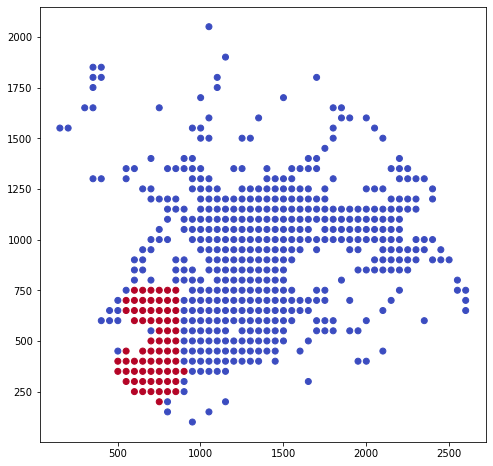

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x = df['x_coord'], y=df['y_coord'], c=df['idc_class'], cmap='coolwarm')
plt.show()

In [9]:
grid = 255*np.ones(shape = (100, 100, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (100, 100, 3)).astype(np.uint8)

In [10]:
grid.shape

(100, 100, 3)

In [11]:
max_x = df['x_coord'].max()
max_y = df['y_coord'].max()

# Shape of (2101, 2651, 3)
# A placeholder for each pixel, with 3 color options and max values for each channel (RGB)
grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

for i in range(len(df)):
        # Get image and label
        image = cv2.imread(df['path'][i])
        idc_class = df['idc_class'][i]
            
        # Extract X and Y coordinates
        x_coord = df['x_coord'][i]
        y_coord = df['y_coord'][i]
        # Add 50 pixels to find ending boundary for each image
        x_end = x_coord + 50
        y_end = y_coord + 50
        
        # Assign image pixel values to placeholder 255 values
        """
        Image is something along the lines of:
        [[[206 164 226]
          [196 154 224]
          [211 175 225]
          ...
          [237 221 240]
          [214 184 232]
          [235 213 243]],
          ...        
        """
        # `grid` will then contain each patch's image values encoded into the grid
        grid[y_coord:y_end, x_coord:x_end] = image
        
        # If `idc_class` is `1`, change the RED channel of the `mask` to 255 (intense red)
        # and other channels to `0` (remove color info, leaving just red)
        if idc_class == 1:
            mask[y_coord:y_end, x_coord:x_end, :1] = 255
            mask[y_coord:y_end, x_coord:x_end, 1:] = 0

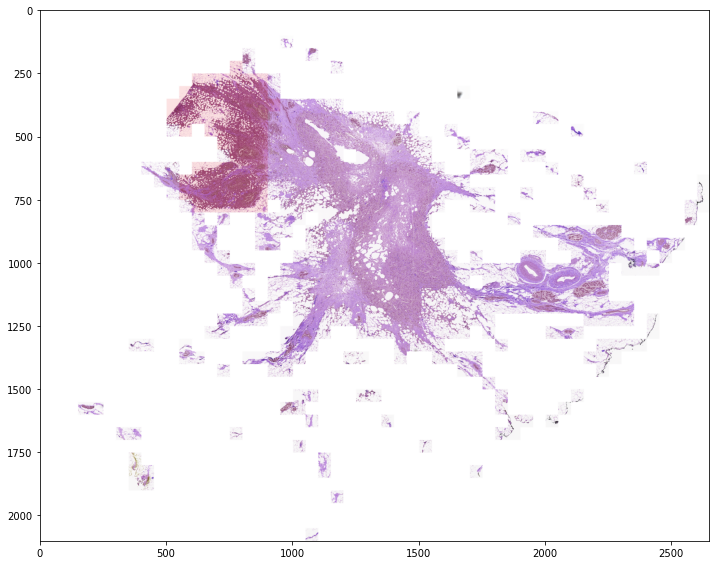

In [12]:
plt.figure(figsize=(12, 12))
plt.imshow(grid)
plt.imshow(mask, alpha=0.1)
plt.show()

In [13]:
from glob import glob
data = glob('./breast-histopathology-images/**/*.png', recursive=True)
print(len(data))
# 277524

277524


In [14]:
dfs = []

for path in data:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    patient_id = split[0].split('\\')[1]
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = split[4][-5]
    
    df_data = {"patient_id": patient_id,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class,
            "path": path}
    df = pd.DataFrame()
    dfs.append(df.append(df_data, ignore_index=True))
    
df_all = pd.concat(dfs)

In [15]:
df_all = df_all.reset_index(drop=True)

In [16]:
df_all

,idc_class,path,patient_id,x_coord,y_coord
0,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1001
1,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1051
2,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1101
3,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1151
4,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1201
...,...,...,...,...,...
277519,1,./breast-histopathology-images\9383\1\9383_idx...,9383,2051,901
277520,1,./breast-histopathology-images\9383\1\9383_idx...,9383,2051,951
277521,1,./breast-histopathology-images\9383\1\9383_idx...,9383,2101,1001
277522,1,./breast-histopathology-images\9383\1\9383_idx...,9383,2101,901


In [17]:
df_all['x_coord'] = df_all['x_coord'].astype('int')
df_all['y_coord'] = df_all['y_coord'].astype('int')
df_all['idc_class'] = df_all['idc_class'].astype('int')

<AxesSubplot:xlabel='idc_class', ylabel='count'>

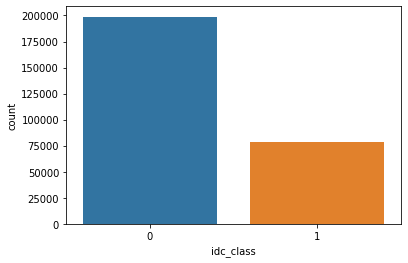

In [18]:
import seaborn as sns
sns.countplot(x='idc_class', data=df_all)

In [19]:
df_all['patient_id'].value_counts()

13693    2395
16550    2302
10288    2278
10308    2278
9323     2216
         ... 
16895     151
9175      118
8957      111
9262       94
16534      63
Name: patient_id, Length: 279, dtype: int64

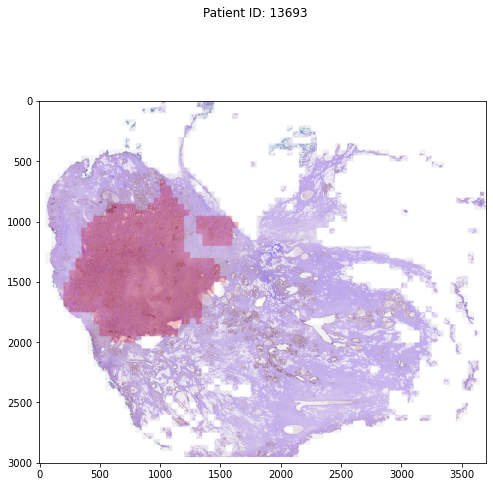

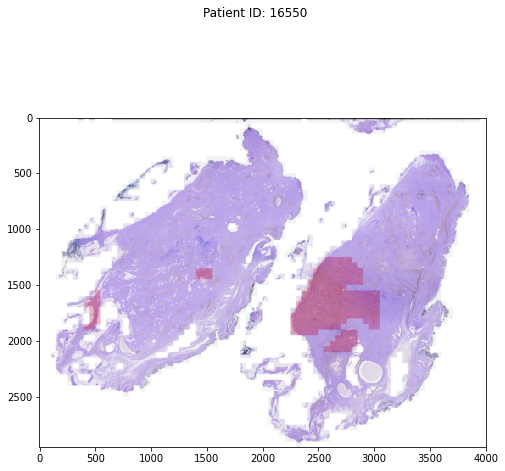

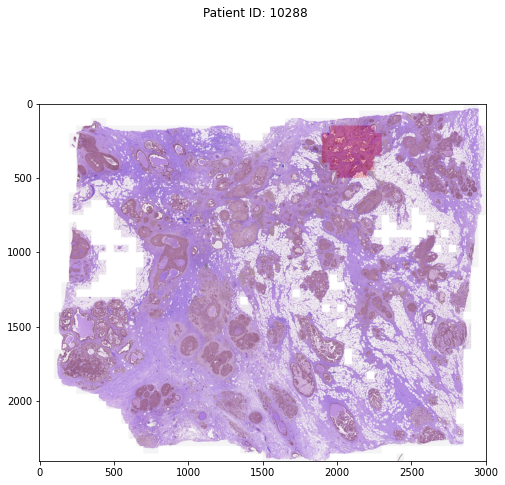

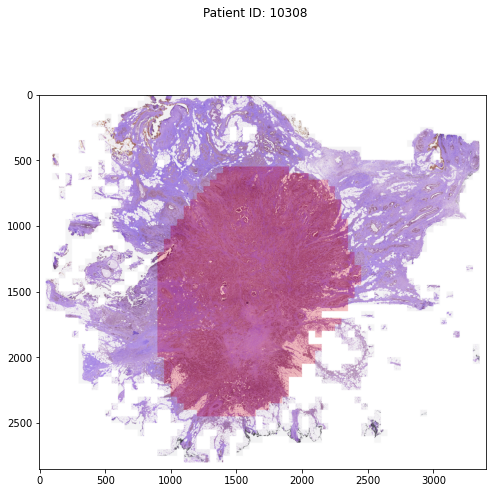

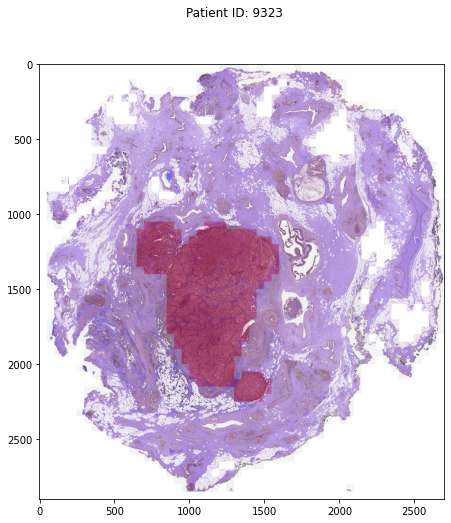

In [20]:
patient_ids = ['13693', '16550', '10288', '10308', '9323']

for patient_id in patient_ids:
    df = df_all.loc[df_all['patient_id'] == patient_id].reset_index(drop=True)
    max_x = df['x_coord'].max()
    max_y = df['y_coord'].max()
    
    grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

    for i in range(len(df)):
        # Get image and label
        image = cv2.imread(df['path'][i])
        if(image.shape==(50, 50, 3)):
            idc_class = df['idc_class'][i]
            x_coord = df['x_coord'][i]
            y_coord = df['y_coord'][i]
            x_end = x_coord + 50
            y_end = y_coord + 50
            
            grid[y_coord:y_end, x_coord:x_end] = image

            if idc_class == 1:
                mask[y_coord:y_end, x_coord:x_end, :1] = 255
                mask[y_coord:y_end, x_coord:x_end, 1:] = 0
                
    plt.figure(figsize=(8, 8))
    plt.suptitle(f'Patient ID: {patient_id}')
    plt.imshow(grid)
    plt.imshow(mask, alpha=0.2)
    plt.show()

In [21]:
if not os.path.exists('./hist_images_truncated/'):
    os.mkdir('./hist_images_truncated/')

    os.mkdir('./hist_images_truncated/train/')
    os.mkdir('./hist_images_truncated/test/')

    os.mkdir('./hist_images_truncated/train/0/')
    os.mkdir('./hist_images_truncated/train/1/')
    os.mkdir('./hist_images_truncated/test/0/')
    os.mkdir('./hist_images_truncated/test/1/')

In [22]:
for batch_num, indices in enumerate(range(1000, int(len(data)/5), 1000), 1):
    x = []
    y = []

    for i in data[indices-1000:indices]:
        if i.endswith('.png'):
            label=i[-5]
            img = cv2.imread(i)
            img = cv2.resize(img,(200,200))
            x.append(img)
            y.append(label)
        
        
    x = np.array(x, dtype='float16')
    y = np.array(y, dtype='float16')
    
    print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}')

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.3)

    for index, img in enumerate(x_train):
        idc_class = y_train[index]
        cv2.imwrite(f"./hist_images_truncated/train/{int(idc_class)}/batch_{batch_num}sample_{index}.png", img.astype('int'))

    for index, img in enumerate(x_test):
        idc_class = y_test[index]
        cv2.imwrite(f"./hist_images_truncated/test/{int(idc_class)}/batch_{batch_num}sample_{index}.png", img.astype('int'))

    import gc
    x = None
    y = None
    gc.collect()

Processing batch 1, with images from 0 to 1000
Processing batch 2, with images from 1000 to 2000
Processing batch 3, with images from 2000 to 3000
Processing batch 4, with images from 3000 to 4000
Processing batch 5, with images from 4000 to 5000
Processing batch 6, with images from 5000 to 6000
Processing batch 7, with images from 6000 to 7000
Processing batch 8, with images from 7000 to 8000
Processing batch 9, with images from 8000 to 9000
Processing batch 10, with images from 9000 to 10000
Processing batch 11, with images from 10000 to 11000
Processing batch 12, with images from 11000 to 12000
Processing batch 13, with images from 12000 to 13000
Processing batch 14, with images from 13000 to 14000
Processing batch 15, with images from 14000 to 15000
Processing batch 16, with images from 15000 to 16000
Processing batch 17, with images from 16000 to 17000
Processing batch 18, with images from 17000 to 18000
Processing batch 19, with images from 18000 to 19000
Processing batch 20, wit

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.3)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('./hist_images_truncated/train/', 
                                                    batch_size=16, subset="training", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
valid_generator = train_datagen.flow_from_directory('./hist_images_truncated/train/', 
                                                    batch_size=16, subset="validation", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
test_generator = test_datagen.flow_from_directory('./hist_images_truncated/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary', 
                                                  target_size=(200, 200),
                                                  shuffle=False)

Using TensorFlow backend.


Found 35027 images belonging to 2 classes.
Found 15010 images belonging to 2 classes.
Found 21473 images belonging to 2 classes.


In [24]:
class_weights = {0:1, 1:1.5}

In [25]:
next(train_generator)[0].shape

(16, 200, 200, 3)

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(l=0.01), padding='same', input_shape=[200, 200, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

model.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_custom_cnn.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]


history = model.fit(train_generator,
                    validation_data = valid_generator,
                    callbacks = callbacks,
                    epochs = 25,
                    class_weight = class_weights)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      8

Finally, let's `evaluate()` the baseline model:

In [27]:
model.evaluate(test_generator)

1343/1343 [==============================] - 28s 21ms/step - loss: 1.3799 - binary_accuracy: 0.4916 - precision: 0.3854 - recall: 0.9819 - auc: 0.6727


[1.3799080848693848,
 0.4916406571865082,
 0.3853733539581299,
 0.9818603992462158,
 0.6726719737052917]

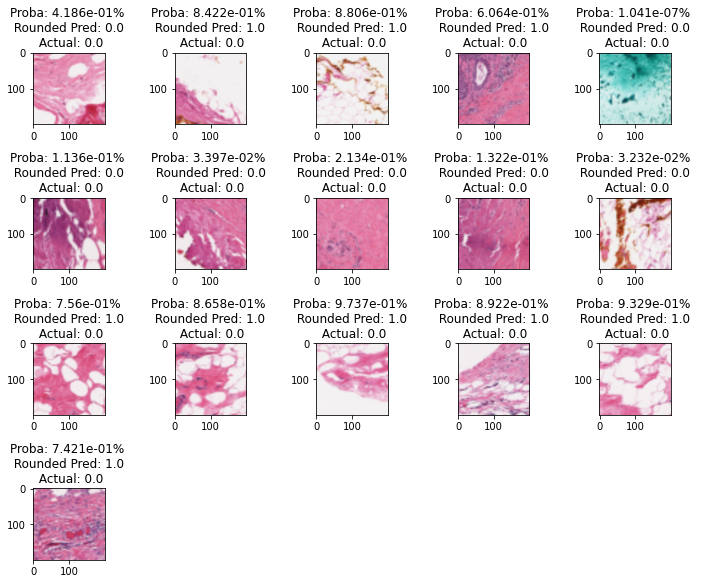

In [28]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

batch = next(test_generator)
images = batch[0]
labels = batch[1]

for index, image in enumerate(images):
    ax = fig.add_subplot(5,5,index+1)
    plt.imshow(image.astype('int'))
    
    image = np.expand_dims(image, 0)
    pred = model.predict(image)
    pred = np.squeeze(pred)
    label = labels[index]
    
    ax.set_title(f'Proba: {np.format_float_scientific(pred, precision=3)}% \n Rounded Pred: {np.round(pred)} \n Actual: {label}')
    
    
plt.tight_layout()
plt.show()

In [29]:
y_pred = model.predict(test_generator)

<AxesSubplot:ylabel='count'>

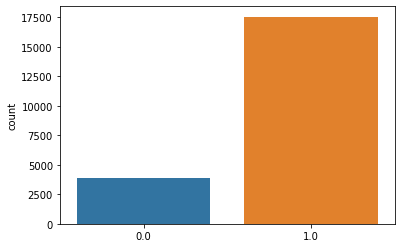

In [30]:
import seaborn as sns
sns.countplot(x=np.round(np.squeeze(y_pred)))

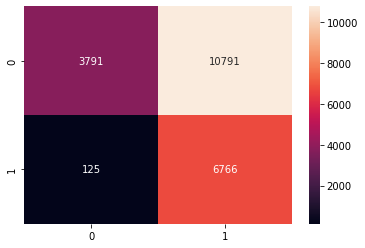

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [32]:
model2_1 = keras.models.Sequential([
    keras.applications.EfficientNetB0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model2_1.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0-imagenet.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model2_1.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history2_1 = model2_1.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
batch_normalization_7 (Batch (None, 7, 7, 1280)        5120      
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               163968    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
2190/2190 [==============================] - 459s 209ms/step - loss: 0.3869 - binary_accuracy: 0.8658 - precision_1: 0.7586 - recall_1: 0.8480 - auc_1: 0.9284 - val_loss: 0.5233 - val_binary_accuracy: 0.7325 - val_precision_1: 0.5532 - val_recall_1: 0.8259 - val_auc_1: 0.8411
Epoch 3/15
2190/2190 [==============================] - 463s 211ms/step - loss: 0.3640 - binary_accuracy: 0.8744 - precision_1: 0.7743 - recall_1: 0.8541 - auc_1: 0.9369 - val_loss: 0.3580 - val_binary_accuracy: 0.8439 - val_precision_1: 0.7083 - val_recall_1: 0.8655 - val_auc_1: 0.9163
Epoch 4/15
2190/2190 [==============================] - 454s 207ms/step - loss: 0.3520 - binary_accuracy: 0.8773 - precision_1: 0.7776 - recall_1: 0.8601 - auc_1: 0.9411 - val_loss: 0.3822 - val_binary_accuracy: 0.8509 - val_precision_1: 0.7447 - val_recall_1: 0.8081 - val_auc_1: 0.9138
Epoch 5/15
2190/2190 [==============================] - 448s 204ms/step - loss: 0.3373 - binary_accuracy: 0.8836 - precision_1: 0.7895 -

Let's `evaluate()` the model:

In [33]:
model2_1.evaluate(test_generator)

1343/1343 [==============================] - 48s 36ms/step - loss: 0.3064 - binary_accuracy: 0.8695 - precision_1: 0.7712 - recall_1: 0.8437 - auc_1: 0.9387


[0.30639371275901794,
 0.8695105314254761,
 0.77118980884552,
 0.8437091708183289,
 0.9387205243110657]

Finally, the evaluation doesn't mean much without visually inspecting the results:

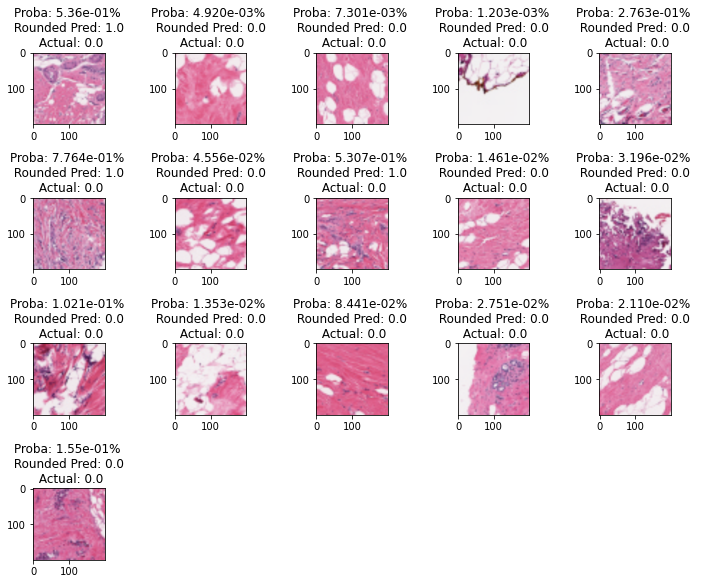

In [34]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

batch = next(test_generator)
images = batch[0]
labels = batch[1]

for index, image in enumerate(images):
    ax = fig.add_subplot(5,5,index+1)
    plt.imshow(image.astype('int'))
    
    image = np.expand_dims(image, 0)
    pred = model2_1.predict(image)
    pred = np.squeeze(pred)
    label = labels[index]
    
    ax.set_title(f'Proba: {np.format_float_scientific(pred, precision=3)}% \n Rounded Pred: {np.round(pred)} \n Actual: {label}')
    
    
plt.tight_layout()
plt.show()

And finally, let's predict the test samples and plot the confusion matrix:

In [35]:
y_pred = model2_1.predict(test_generator)

<AxesSubplot:ylabel='count'>

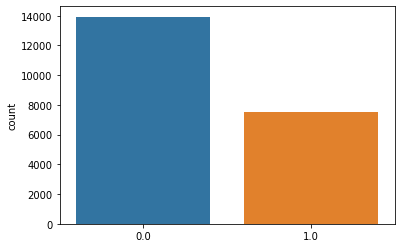

In [36]:
sns.countplot(x=np.round(np.squeeze(y_pred)))

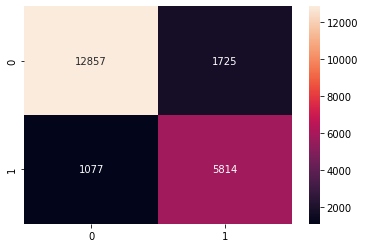

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [38]:
model3 = keras.models.Sequential([
    keras.applications.VGG16(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_vgg16.h5',  save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model3.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history3 = model3.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
batch_normalization_8 (Batch (None, 6, 6, 512)         2048      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [39]:
model3.evaluate(test_generator)

1343/1343 [==============================] - 90s 67ms/step - loss: 0.8896 - binary_accuracy: 0.7295 - precision_2: 0.8773 - recall_2: 0.1826 - auc_2: 0.8766


[0.8895999193191528,
 0.7294742465019226,
 0.8772664070129395,
 0.18255695700645447,
 0.8766466379165649]

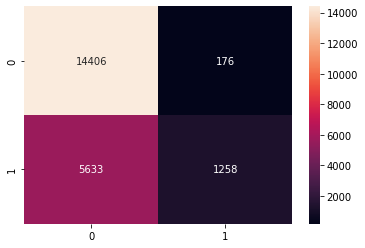

In [40]:
y_pred = model3.predict(test_generator)

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [41]:
model4 = keras.models.Sequential([
    keras.applications.ResNet50(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model4.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_resnet50.h5',  save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model4.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history4 = model4.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 23,850,113
Trainable params: 23,796,993
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/15
2190/2190 [==============================] - 497s 225ms/step - loss: 0.4989 - binary_accuracy: 0.8230 - precision_3: 0.7022 - recall_3: 0.7700 - auc_3: 0.8813 - val_loss: 0.4030 - val_binary_accuracy: 0.8258 - val_precision_

d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
2190/2190 [==============================] - 489s 223ms/step - loss: 0.4617 - binary_accuracy: 0.8350 - precision_3: 0.7185 - recall_3: 0.7910 - auc_3: 0.8973 - val_loss: 0.7351 - val_binary_accuracy: 0.8051 - val_precision_3: 0.8211 - val_recall_3: 0.4951 - val_auc_3: 0.8682
Epoch 3/15
2190/2190 [==============================] - 490s 224ms/step - loss: 0.4402 - binary_accuracy: 0.8410 - precision_3: 0.7227 - recall_3: 0.8110 - auc_3: 0.9075 - val_loss: 0.5740 - val_binary_accuracy: 0.7618 - val_precision_3: 0.5767 - val_recall_3: 0.9424 - val_auc_3: 0.8864
Epoch 4/15
2190/2190 [==============================] - 490s 224ms/step - loss: 0.4201 - binary_accuracy: 0.8506 - precision_3: 0.7375 - recall_3: 0.8235 - auc_3: 0.9158 - val_loss: 0.8492 - val_binary_accuracy: 0.6875 - val_precision_3: 0.6971 - val_recall_3: 0.0304 - val_auc_3: 0.6574
Epoch 5/15
2190/2190 [==============================] - 489s 223ms/step - loss: 0.4107 - binary_accuracy: 0.8535 - precision_3: 0.7436 -

In [42]:
model4.evaluate(test_generator)

1343/1343 [==============================] - 74s 55ms/step - loss: 1.9057 - binary_accuracy: 0.7321 - precision_3: 0.8633 - recall_3: 0.1962 - auc_3: 0.7250


[1.9056514501571655,
 0.7320821285247803,
 0.8633460998535156,
 0.19619794189929962,
 0.725024938583374]

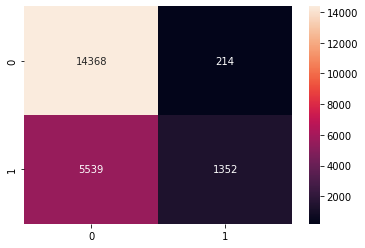

In [43]:
y_pred = model4.predict(test_generator)

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [44]:
model5 = keras.models.Sequential([
    keras.applications.Xception(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model5.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_xception.h5',  save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model5.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history5 = model5.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 21,123,881
Trainable params: 21,069,353
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/15
2190/2190 [==============================] - 659s 299ms/step - loss: 0.4626 - binary_accuracy: 0.8365 - precision_4: 0.7162 - recall_4: 0.8048 - auc_4: 0.8980 - val_loss: 0.3833 - val_binary_accuracy: 0.8432 - val_precision_

d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
2190/2190 [==============================] - 653s 298ms/step - loss: 0.3975 - binary_accuracy: 0.8596 - precision_4: 0.7482 - recall_4: 0.8418 - auc_4: 0.9245 - val_loss: 0.4280 - val_binary_accuracy: 0.8328 - val_precision_4: 0.7956 - val_recall_4: 0.6384 - val_auc_4: 0.9067
Epoch 3/15
2190/2190 [==============================] - 654s 299ms/step - loss: 0.3785 - binary_accuracy: 0.8678 - precision_4: 0.7629 - recall_4: 0.8476 - auc_4: 0.9316 - val_loss: 0.3966 - val_binary_accuracy: 0.8299 - val_precision_4: 0.7262 - val_recall_4: 0.7467 - val_auc_4: 0.8880
Epoch 4/15
2190/2190 [==============================] - 657s 300ms/step - loss: 0.3615 - binary_accuracy: 0.8750 - precision_4: 0.7745 - recall_4: 0.8560 - auc_4: 0.9377 - val_loss: 0.3701 - val_binary_accuracy: 0.8358 - val_precision_4: 0.7134 - val_recall_4: 0.8087 - val_auc_4: 0.9006
Epoch 5/15
2190/2190 [==============================] - 656s 299ms/step - loss: 0.3479 - binary_accuracy: 0.8812 - precision_4: 0.7850 -

In [45]:
model5.evaluate(test_generator)

1343/1343 [==============================] - 76s 56ms/step - loss: 0.3465 - binary_accuracy: 0.8744 - precision_4: 0.7814 - recall_4: 0.8452 - auc_4: 0.9346


[0.34652045369148254,
 0.8744469881057739,
 0.7814303040504456,
 0.8451603651046753,
 0.9346293807029724]

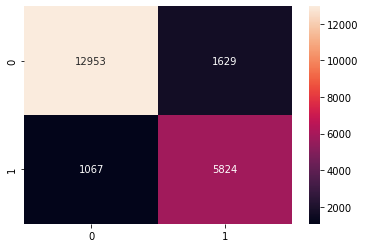

In [46]:
y_pred = model5.predict(test_generator)

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

1343/1343 [==============================] - 76s 57ms/step - loss: 0.3465 - binary_accuracy: 0.8744 - precision_4: 0.7814 - recall_4: 0.8452 - auc_4: 0.9346
              Recall  Precision       AUC
Custom CNN  0.981860   0.385373  0.672672
EffNetB0    0.843709   0.771190  0.938721
VGG16       0.182557   0.877266  0.876647
ResNet50    0.196198   0.863346  0.725025
Xception    0.845160   0.781430  0.934629


<AxesSubplot:xlabel='variable', ylabel='value'>

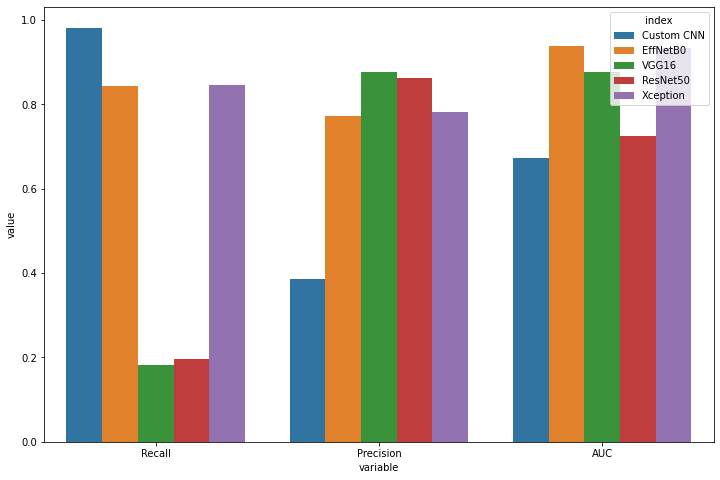

In [47]:
# Evaluate the models to get performance stats
preds_custom = model.evaluate(test_generator)
preds_effnet = model2_1.evaluate(test_generator)
preds_vgg = model3.evaluate(test_generator)
preds_resnet = model4.evaluate(test_generator)
preds_xception = model5.evaluate(test_generator)

# Extract into relevant model-related stats
cnn_recall, cnn_precision, cnn_auc, cnn_params = preds_custom[3], preds_custom[2], preds_custom[4], model.count_params()
effnet_recall, effnet_precision, effnet_auc, effnet_params = preds_effnet[3], preds_effnet[2], preds_effnet[4], model2_1.count_params()
vgg_recall, vgg_precision, vgg_auc, vgg_params = preds_vgg[3], preds_vgg[2], preds_vgg[4], model3.count_params()
resnet_recall, resnet_precision, resnet_auc, resnet_params = preds_resnet[3], preds_resnet[2], preds_resnet[4], model4.count_params()
xception_recall, xception_precision, xception_auc, xcecption_params = preds_xception[3], preds_xception[2], preds_xception[4], model5.count_params()

# Create dict to hold values
data = {
    'Custom CNN' : [cnn_recall, cnn_precision, cnn_auc],
    'EffNetB0' : [effnet_recall, effnet_precision, effnet_auc],
    'VGG16' : [vgg_recall, vgg_precision, vgg_auc],
    'ResNet50' : [resnet_recall, resnet_precision, resnet_auc],
    'Xception' : [xception_recall, xception_precision, xception_auc]
}

# Dict to DF
df = pd.DataFrame(data, index = ["Recall", "Precision", "AUC"]).T

print(df)

fig, ax = plt.subplots(figsize=(12, 8))

df_bar = df.reset_index().melt(id_vars=["index"])
sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax=ax)

In [48]:
import keras_tuner as kt
def build_effnet(hp):
    model = keras.Sequential()
    model.add(keras.applications.EfficientNetB0(input_shape=(200,200,3), 
                                                weights='imagenet',
                                                include_top=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dropout(hp.Choice('dropout', [0.2, 0.3, 0.4, 0.5])))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(hp.Int('units', min_value=16, max_value=512, step=32), activation=hp.Choice('activation', ['relu', 'swish'])))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                 optimizer=hp.Choice('optimizer', ['adam', 'sgd', 'nadam']))

    return model


In [49]:
tuner = kt.Hyperband(
    build_effnet,
    objective='val_loss',
    max_epochs=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [50]:
tuner.search(train_generator, 
             epochs=5, 
             validation_data=valid_generator)

INFO:tensorflow:Oracle triggered exit


In [51]:
tuned_model = tuner.get_best_models()[0]

In [52]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
dropout: 0.2
units: 272
activation: relu
optimizer: adam
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.25514304637908936
Trial summary
Hyperparameters:
dropout: 0.2
units: 176
activation: relu
optimizer: adam
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 2b4d8a57b8b2124902e109de7accd631
Score: 0.2704789936542511
Trial summary
Hyperparameters:
dropout: 0.2
units: 400
activation: swish
optimizer: sgd
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.27398601174354553
Trial summary
Hyperparameters:
dropout: 0.3
units: 432
activation: swish
optimizer: sgd
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.274783194065094
Trial summary
Hyperparameters:
dropout: 0.2
units: 368
activation: swish
optimizer: nadam
tuner/e

In [53]:
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [54]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0_tuned.h5',  save_best_only=True, monitor='val_f1'),
    tf.keras.callbacks.ReduceLROnPlateau()
]

tuned_model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

tuned_model_history = tuned_model.fit(train_generator,
                     validation_data=valid_generator,
                     callbacks=callbacks,
                     epochs=50,
                     class_weight=class_weights)

Epoch 1/50
2190/2190 [==============================] - 461s 208ms/step - loss: 0.4246 - f1: 0.7607 - binary_accuracy: 0.8500 - precision: 0.7397 - recall: 0.8154 - auc: 0.9142 - val_loss: 0.3829 - val_f1: 0.7519 - val_binary_accuracy: 0.8446 - val_precision: 0.7247 - val_recall: 0.8246 - val_auc: 0.9076


d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
2190/2190 [==============================] - 493s 225ms/step - loss: 0.3843 - f1: 0.7858 - binary_accuracy: 0.8668 - precision: 0.7660 - recall: 0.8369 - auc: 0.9299 - val_loss: 0.3721 - val_f1: 0.7435 - val_binary_accuracy: 0.8368 - val_precision: 0.7047 - val_recall: 0.8376 - val_auc: 0.9112
Epoch 3/50
2190/2190 [==============================] - 533s 243ms/step - loss: 0.3614 - f1: 0.7982 - binary_accuracy: 0.8752 - precision: 0.7761 - recall: 0.8537 - auc: 0.9380 - val_loss: 0.3623 - val_f1: 0.7580 - val_binary_accuracy: 0.8462 - val_precision: 0.7216 - val_recall: 0.8406 - val_auc: 0.9141
Epoch 4/50
2190/2190 [==============================] - 522s 238ms/step - loss: 0.3475 - f1: 0.8053 - binary_accuracy: 0.8806 - precision: 0.7867 - recall: 0.8567 - auc: 0.9427 - val_loss: 0.3709 - val_f1: 0.7259 - val_binary_accuracy: 0.8356 - val_precision: 0.7254 - val_recall: 0.7775 - val_auc: 0.9046
Epoch 5/50
2190/2190 [==============================] - 545s 249ms/step - loss: 0.

In [55]:
tuned_model.evaluate(test_generator)

1343/1343 [==============================] - 52s 39ms/step - loss: 0.3974 - f1: 0.3008 - binary_accuracy: 0.8411 - precision: 0.6972 - recall: 0.8923 - auc: 0.9307


[0.39738863706588745,
 0.3007788062095642,
 0.8411027789115906,
 0.6972445845603943,
 0.8923233151435852,
 0.930749237537384]

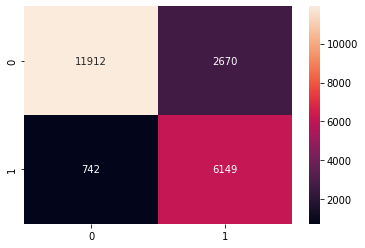

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = tuned_model.predict(test_generator)

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [57]:
model_test = keras.models.Sequential([
    keras.applications.EfficientNetB0(input_shape=(200,100,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0_f1_loss.h5',  save_best_only=True, monitor="val_f1"),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model_test.compile(loss=f1_loss,
              optimizer='adam',
              metrics=[
                  f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

model_test_history = model_test.fit(train_generator,
                     validation_data=valid_generator,
                     callbacks=callbacks,
                     epochs=15,
                    class_weight=class_weights)

Epoch 1/15
2190/2190 [==============================] - 475s 214ms/step - loss: 0.5844 - f1: 0.4929 - binary_accuracy: 0.6993 - precision_2: 0.5272 - recall_2: 0.5278 - auc_2: 0.6541 - val_loss: 0.3397 - val_f1: 0.6596 - val_binary_accuracy: 0.8072 - val_precision_2: 0.7090 - val_recall_2: 0.6677 - val_auc_2: 0.7731


d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
2190/2190 [==============================] - 460s 210ms/step - loss: 0.4294 - f1: 0.6263 - binary_accuracy: 0.7518 - precision_2: 0.5956 - recall_2: 0.6848 - auc_2: 0.7346 - val_loss: 0.3261 - val_f1: 0.6742 - val_binary_accuracy: 0.7699 - val_precision_2: 0.6010 - val_recall_2: 0.8221 - val_auc_2: 0.7843
Epoch 3/15
2190/2190 [==============================] - 459s 209ms/step - loss: 0.4109 - f1: 0.6418 - binary_accuracy: 0.7618 - precision_2: 0.6061 - recall_2: 0.7171 - auc_2: 0.7508 - val_loss: 0.3217 - val_f1: 0.6776 - val_binary_accuracy: 0.7775 - val_precision_2: 0.6129 - val_recall_2: 0.8150 - val_auc_2: 0.7882
Epoch 4/15
2190/2190 [==============================] - 451s 206ms/step - loss: 0.4608 - f1: 0.5979 - binary_accuracy: 0.7086 - precision_2: 0.5305 - recall_2: 0.7298 - auc_2: 0.7146 - val_loss: 0.3576 - val_f1: 0.6418 - val_binary_accuracy: 0.8118 - val_precision_2: 0.7526 - val_recall_2: 0.6080 - val_auc_2: 0.7575
Epoch 5/15
2190/2190 [========================

In [59]:
model_test.evaluate(test_generator)

1343/1343 [==============================] - 48s 36ms/step - loss: 0.7261 - f1: 0.2744 - binary_accuracy: 0.6717 - precision_2: 0.4927 - recall_2: 0.7777 - auc_2: 0.6997


[0.7261176109313965,
 0.27438536286354065,
 0.6716806888580322,
 0.4926910102367401,
 0.7776810526847839,
 0.6997209787368774]

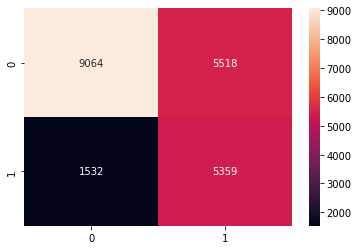

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_test.predict(test_generator)

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [61]:
if not os.path.exists('./hist_images/'):
    os.mkdir('./hist_images/')

    os.mkdir('./hist_images/train/')
    os.mkdir('./hist_images/test/')

    os.mkdir('./hist_images/train/0/')
    os.mkdir('./hist_images/train/1/')
    os.mkdir('./hist_images/test/0/')
    os.mkdir('./hist_images/test/1/')

In [62]:
from glob import glob
data = glob('./breast-histopathology-images/**/*.png', recursive=True)
print(len(data))

277524


In [63]:
for batch_num, indices in enumerate(range(1000, len(data), 1000), 1):
    x = []
    y = []

    for i in data[indices-1000:indices]:
        if i.endswith('.png'):
            label=i[-5]
            img = cv2.imread(i)
            img = cv2.resize(img,(200,200))
            x.append(img)
            y.append(label)
        
        
    x = np.array(x, dtype='float16')
    y = np.array(y, dtype='float16')
    
    print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}')

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.3)

    for index, img in enumerate(x_train):
        idc_class = y_train[index]
        cv2.imwrite(f"./hist_images/train/{int(idc_class)}/batch_{batch_num}_sample_{index}.png", img.astype('int'))

    for index, img in enumerate(x_test):
        idc_class = y_test[index]
        cv2.imwrite(f"./hist_images/test/{int(idc_class)}/batch_{batch_num}_sample_{index}.png", img.astype('int'))

    import gc
    x = None
    y = None
    gc.collect()

Processing batch 1, with images from 0 to 1000
Processing batch 2, with images from 1000 to 2000
Processing batch 3, with images from 2000 to 3000
Processing batch 4, with images from 3000 to 4000
Processing batch 5, with images from 4000 to 5000
Processing batch 6, with images from 5000 to 6000
Processing batch 7, with images from 6000 to 7000
Processing batch 8, with images from 7000 to 8000
Processing batch 9, with images from 8000 to 9000
Processing batch 10, with images from 9000 to 10000
Processing batch 11, with images from 10000 to 11000
Processing batch 12, with images from 11000 to 12000
Processing batch 13, with images from 12000 to 13000
Processing batch 14, with images from 13000 to 14000
Processing batch 15, with images from 14000 to 15000
Processing batch 16, with images from 15000 to 16000
Processing batch 17, with images from 16000 to 17000
Processing batch 18, with images from 17000 to 18000
Processing batch 19, with images from 18000 to 19000
Processing batch 20, wit

In [64]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.3)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('./hist_images/train/', 
                                                    batch_size=16, subset="training", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
valid_generator = train_datagen.flow_from_directory('./hist_images/train/', 
                                                    batch_size=16, subset="validation", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
test_generator = test_datagen.flow_from_directory('./hist_images/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary', 
                                                  target_size=(200, 200),
                                                  shuffle=False)

Using TensorFlow backend.


Found 135731 images belonging to 2 classes.
Found 58169 images belonging to 2 classes.
Found 83100 images belonging to 2 classes.


In [65]:
model_all = keras.models.Sequential([
    keras.applications.EfficientNetB0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_all.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0-imagenet-all_b0.h5', save_best_only=True, monitor='val_f1'),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model_all.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 1280)        5120      
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               163968    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [66]:
history = model_all.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     class_weight = class_weights,
                     epochs = 25)

Epoch 1/25
8484/8484 [==============================] - 5347s 630ms/step - loss: 0.3995 - f1: 0.7451 - binary_accuracy: 0.8584 - precision_4: 0.7294 - recall_4: 0.7971 - auc_4: 0.9188 - val_loss: 0.3919 - val_f1: 0.7500 - val_binary_accuracy: 0.8471 - val_precision_4: 0.6701 - val_recall_4: 0.9095 - val_auc_4: 0.9412


d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
8484/8484 [==============================] - 1750s 206ms/step - loss: 0.3511 - f1: 0.7724 - binary_accuracy: 0.8763 - precision_4: 0.7548 - recall_4: 0.8361 - auc_4: 0.9374 - val_loss: 0.3314 - val_f1: 0.7611 - val_binary_accuracy: 0.8589 - val_precision_4: 0.6971 - val_recall_4: 0.8901 - val_auc_4: 0.9370
Epoch 3/25
8484/8484 [==============================] - 1750s 206ms/step - loss: 0.3326 - f1: 0.7869 - binary_accuracy: 0.8838 - precision_4: 0.7663 - recall_4: 0.8505 - auc_4: 0.9438 - val_loss: 0.2511 - val_f1: 0.8009 - val_binary_accuracy: 0.8976 - val_precision_4: 0.8077 - val_recall_4: 0.8395 - val_auc_4: 0.9513
Epoch 4/25
8484/8484 [==============================] - 1726s 203ms/step - loss: 0.3225 - f1: 0.7925 - binary_accuracy: 0.8881 - precision_4: 0.7773 - recall_4: 0.8495 - auc_4: 0.9474 - val_loss: 0.2344 - val_f1: 0.8152 - val_binary_accuracy: 0.9046 - val_precision_4: 0.8206 - val_recall_4: 0.8500 - val_auc_4: 0.9587
Epoch 5/25
8484/8484 [=====================

No handles with labels found to put in legend.


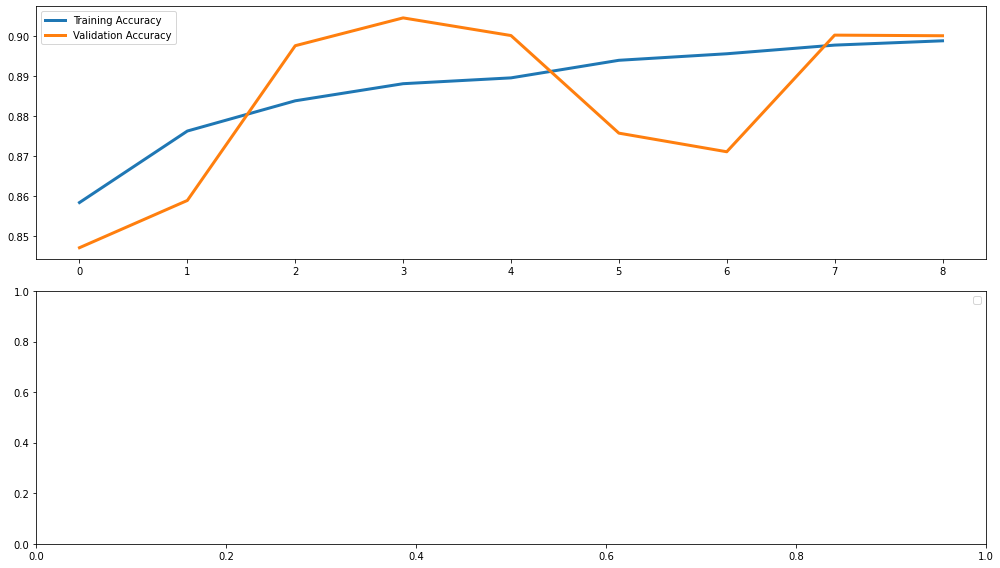

In [67]:
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(2, figsize=(14,8))
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["binary_accuracy"], 
        label="Training Accuracy", lw=3)
ax[0].plot(np.arange(0, num_epochs), model_history["val_binary_accuracy"], 
        label="Validation Accuracy", lw=3)

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

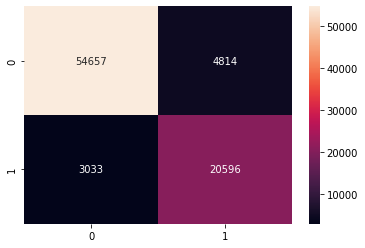

In [68]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_all.predict(test_generator)

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [69]:
test_generator = test_datagen.flow_from_directory('./hist_images/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary', 
                                                  target_size=(200, 200),
                                                  shuffle=True)

Found 83100 images belonging to 2 classes.


In [70]:
model_all.evaluate(test_generator)

5194/5194 [==============================] - 188s 36ms/step - loss: 0.2345 - f1: 0.8204 - binary_accuracy: 0.9056 - precision_4: 0.8105 - recall_4: 0.8716 - auc_4: 0.9627


[0.23449794948101044,
 0.8204426169395447,
 0.9055715799331665,
 0.8105470538139343,
 0.8716408014297485,
 0.962689995765686]

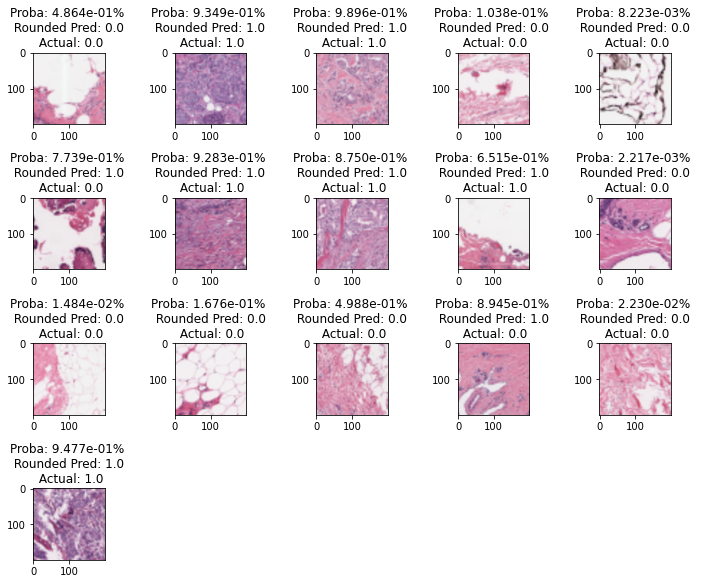

In [71]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

batch = next(test_generator)
images = batch[0]
labels = batch[1]

for index, image in enumerate(images):
    ax = fig.add_subplot(5,5,index+1)
    plt.imshow(image.astype('int'))
    
    image = np.expand_dims(image, 0)
    pred = model_all.predict(image)
    pred = np.squeeze(pred)
    label = labels[index]
    
    ax.set_title(f'Proba: {np.format_float_scientific(pred, precision=3)}% \n Rounded Pred: {np.round(pred)} \n Actual: {label}')
    
    
plt.tight_layout()
plt.show()

In [72]:
model = keras.models.load_model('breast_cancer_effnetb0-imagenet-all_b0.h5', custom_objects={'f1':f1})

In [73]:
batch = next(test_generator)
images = batch[0]
labels = batch[1]

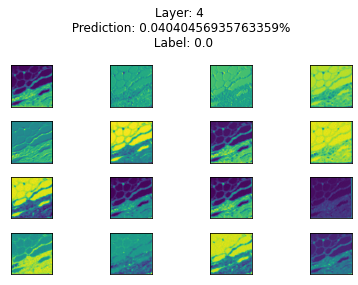

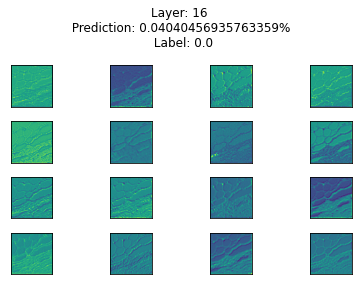

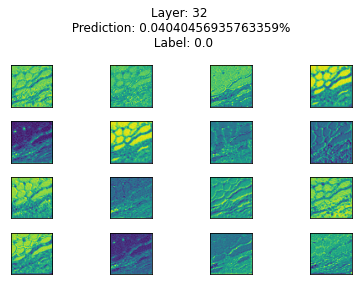

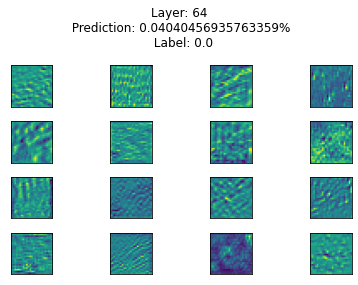

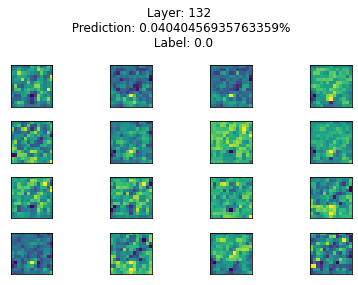

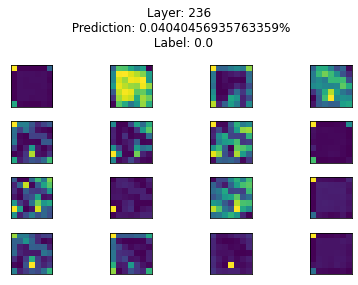

In [74]:
for layer_num in [4, 16, 32, 64, 132, 236]:
        model_trunc = keras.Model(inputs=model.layers[0].inputs, outputs=model.layers[0].layers[layer_num].output)
    
        feature_maps = model_trunc.predict(np.expand_dims(images[0], 0))
        pred = model.predict(np.expand_dims(images[0], 0))
        label = labels[0]
        
        ix = 1
        for _ in range(4):
            plt.suptitle(f'Layer: {layer_num} \n Prediction: {np.squeeze(pred)}% \n Label: {label}')
            
            for _ in range(4):
                # specify subplot and turn of axis
                ax = plt.subplot(4, 4, ix)
                ax.imshow(feature_maps[0, :, :, ix-1])
                ax.set_xticks([])
                ax.set_yticks([])
                ix += 1
        
        plt.tight_layout()
        plt.show()

In [75]:
b4 = keras.models.Sequential([
    keras.applications.EfficientNetB3(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

b4.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb4-imagenet-all.h5', save_best_only=True, monitor='val_f1'),
    tf.keras.callbacks.ReduceLROnPlateau()
]

b4.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

43941888/43941136 [==============================] - 4s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 7, 7, 1536)        10783535  
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 1536)        6144      
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1536)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1536)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               196736    
_______________________________________________________

In [76]:
history = b4.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     class_weight = class_weights,
                     epochs = 25)

Epoch 1/25
8484/8484 [==============================] - 7259s 854ms/step - loss: 0.4081 - f1: 0.7397 - binary_accuracy: 0.8552 - precision_3: 0.7213 - recall_3: 0.7991 - auc_3: 0.9149 - val_loss: 0.2551 - val_f1: 0.7968 - val_binary_accuracy: 0.8932 - val_precision_3: 0.7911 - val_recall_3: 0.8479 - val_auc_3: 0.9531


d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
8484/8484 [==============================] - 2909s 343ms/step - loss: 0.3551 - f1: 0.7720 - binary_accuracy: 0.8753 - precision_3: 0.7541 - recall_3: 0.8324 - auc_3: 0.9360 - val_loss: 0.2540 - val_f1: 0.7823 - val_binary_accuracy: 0.8974 - val_precision_3: 0.8607 - val_recall_3: 0.7624 - val_auc_3: 0.9537
Epoch 3/25
8484/8484 [==============================] - 2918s 344ms/step - loss: 0.3361 - f1: 0.7848 - binary_accuracy: 0.8832 - precision_3: 0.7681 - recall_3: 0.8435 - auc_3: 0.9427 - val_loss: 0.2569 - val_f1: 0.8036 - val_binary_accuracy: 0.8908 - val_precision_3: 0.7654 - val_recall_3: 0.8878 - val_auc_3: 0.9565
Epoch 4/25
8484/8484 [==============================] - 2891s 341ms/step - loss: 0.3231 - f1: 0.7916 - binary_accuracy: 0.8874 - precision_3: 0.7771 - recall_3: 0.8465 - auc_3: 0.9473 - val_loss: 0.2456 - val_f1: 0.8111 - val_binary_accuracy: 0.8949 - val_precision_3: 0.7697 - val_recall_3: 0.8989 - val_auc_3: 0.9591
Epoch 5/25
8484/8484 [=====================

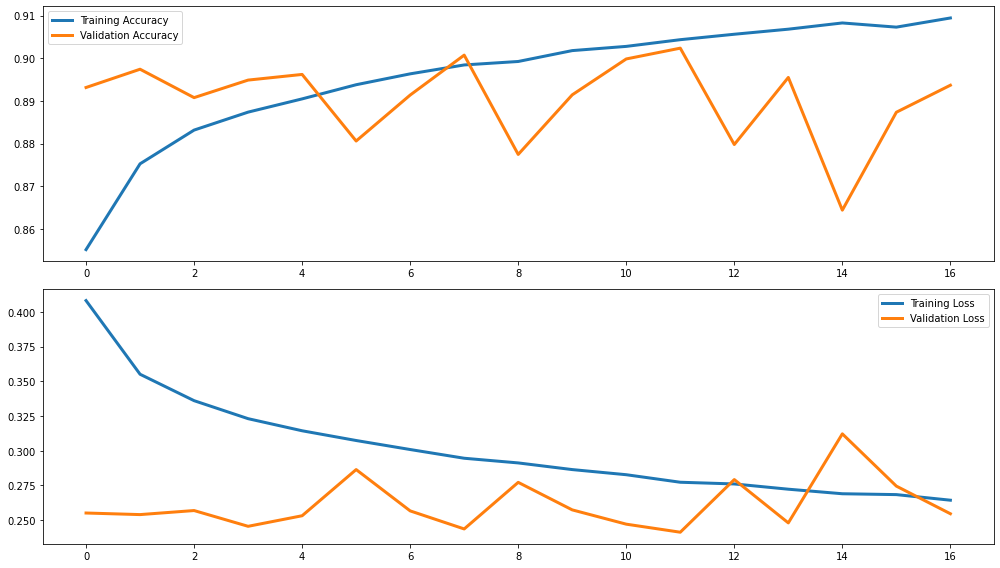

In [77]:
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(2, figsize=(14,8))
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["binary_accuracy"], 
        label="Training Accuracy", lw=3)
ax[0].plot(np.arange(0, num_epochs), model_history["val_binary_accuracy"], 
        label="Validation Accuracy", lw=3)

ax[1].plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Training Loss", lw=3)
ax[1].plot(np.arange(0, num_epochs), model_history["val_loss"], 
        label="Validation Loss", lw=3)

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

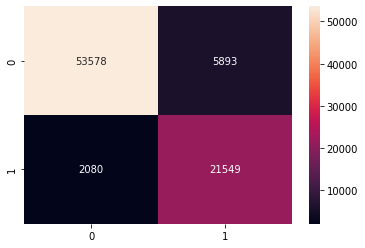

In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = b4.predict(test_generator)

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [79]:
test_generator = test_datagen.flow_from_directory('./hist_images/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary', 
                                                  target_size=(200, 200),
                                                  shuffle=True)

Found 83100 images belonging to 2 classes.


In [80]:
b4.evaluate(test_generator)

5194/5194 [==============================] - 327s 63ms/step - loss: 0.2275 - f1: 0.8271 - binary_accuracy: 0.9041 - precision_3: 0.7853 - recall_3: 0.9120 - auc_3: 0.9659


[0.22753377258777618,
 0.8270873427391052,
 0.9040553569793701,
 0.7852561473846436,
 0.9119725823402405,
 0.9658520817756653]